In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = {}

for ticker in tickers:
    print(f"Baixando dados para {ticker}...")
    data = yf.download(ticker, start="2017-01-01", end="2023-12-31")
    
    if 'Adj Close' in data.columns:
        data.index = pd.to_datetime(data.index)
        data = data.asfreq('D')  # Define a frequência como diária
        data['Adj Close'] = data['Adj Close'].interpolate(method='time')  # Preenchendo NaNs
        data['Ticker'] = ticker  # Adicionar a coluna 'Ticker'
        stocks_data[ticker] = data[['Adj Close', 'Ticker']] 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Baixando dados para AAPL...
Baixando dados para MSFT...
Baixando dados para GOOGL...
Baixando dados para AMZN...
Baixando dados para META...


In [13]:
predicted_values = pd.DataFrame()

ADF Statistic for AAPL: -0.032425632848527904
P-value for AAPL: 0.9557669389822422


<Figure size 864x432 with 0 Axes>

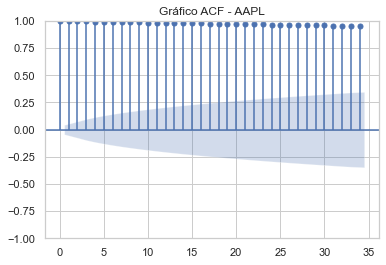

<Figure size 864x432 with 0 Axes>

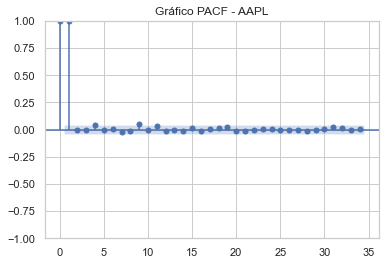

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7199.717, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7201.188, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7201.190, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7202.300, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7203.189, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.588 seconds
Métricas para AAPL:
MSE: 432.6744
MAE: 17.1037
R²: -0.1680

ADF Statistic for MSFT: -0.4481357043589946
P-value for MSFT: 0.9017463315385668


<Figure size 864x432 with 0 Axes>

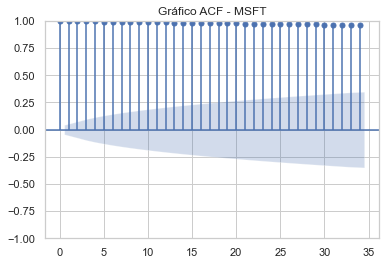

<Figure size 864x432 with 0 Axes>

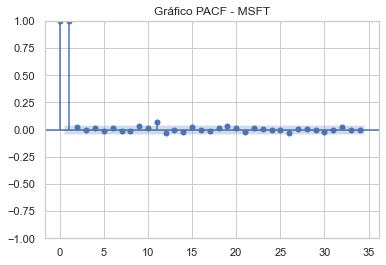

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9545.433, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9547.450, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9539.452, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9539.585, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9549.239, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9541.432, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9541.438, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9543.320, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9541.805, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.330 seconds
Métricas para MSFT:
MSE: 1306.7421
MAE: 30.0216
R²: 0.4069

ADF Statistic for GOOGL: -0.6539199257222637
P-value for GOOGL: 0.8583271158447473


<Figure size 864x432 with 0 Axes>

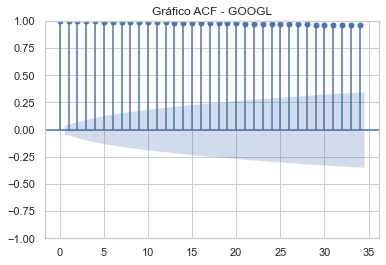

<Figure size 864x432 with 0 Axes>

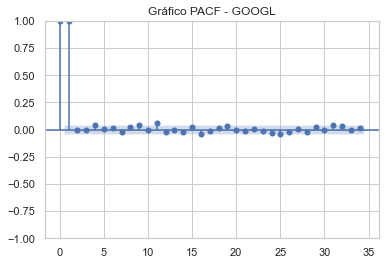

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6463.407, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6455.905, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6457.871, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6457.871, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6455.996, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6459.871, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.884 seconds
Métricas para GOOGL:
MSE: 348.8097
MAE: 14.7129
R²: -0.2527

ADF Statistic for AMZN: -1.4754540913381833
P-value for AMZN: 0.5456170288584148


<Figure size 864x432 with 0 Axes>

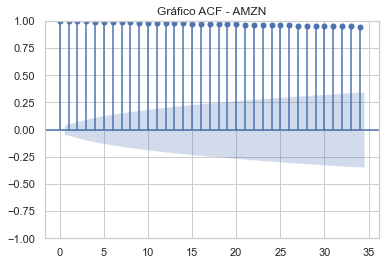

<Figure size 864x432 with 0 Axes>

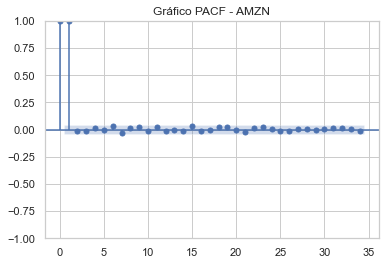

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8378.538, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8376.511, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8378.351, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8378.362, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8375.973, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8379.241, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.133 seconds
Métricas para AMZN:
MSE: 895.7448
MAE: 24.1966
R²: -1.3418

ADF Statistic for META: -1.7640730869825025
P-value for META: 0.3984385633771539


<Figure size 864x432 with 0 Axes>

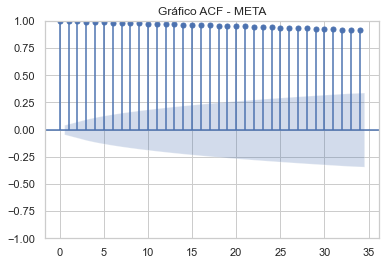

<Figure size 864x432 with 0 Axes>

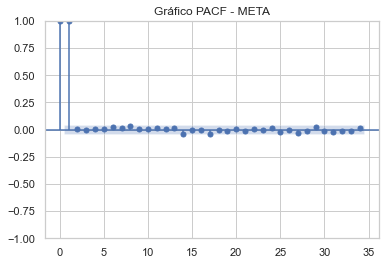

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11635.448, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11627.594, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11629.529, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11629.530, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11625.659, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11631.530, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.592 seconds
Métricas para META:
MSE: 9517.6626
MAE: 80.1636
R²: -0.5046



In [16]:
for ticker in tickers:
    df = stocks_data[ticker]
    
    # Dividir os dados em treino e teste
    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    # Remover NaNs
    train = train.dropna()
    test = test.dropna()

    # Verificando a estacionaridade
    result = adfuller(train['Adj Close'])
    print(f"ADF Statistic for {ticker}: {result[0]}")
    print(f"P-value for {ticker}: {result[1]}")
    
    # Gráficos ACF e PACF
    plt.figure(figsize=(12, 6))
    plot_acf(train['Adj Close'].dropna())
    plt.title(f'Gráfico ACF - {ticker}')
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(train['Adj Close'].dropna())
    plt.title(f'Gráfico PACF - {ticker}')
    plt.show()

    # Diferenciação para tornar a série estacionária
    train['Adj Close Diff'] = train['Adj Close'].diff()
    train.dropna(inplace=True)  # Remover NaNs após a diferenciação

    # Ajuste do modelo usando auto_arima
    model = auto_arima(train['Adj Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

    # Previsões
    forecast = model.predict(n_periods=len(test))  # Prever o tamanho do conjunto de teste
    
    # Cálculo das métricas de erro
    if not test['Adj Close'].isnull().any():
        mse = mean_squared_error(test['Adj Close'].values, forecast)
        mae = mean_absolute_error(test['Adj Close'].values, forecast)
        r2 = r2_score(test['Adj Close'].values, forecast)

        print(f"Métricas para {ticker}:")
        print(f"MSE: {mse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R²: {r2:.4f}\n")

        # Armazenar as previsões, adicionando a coluna 'Ticker'
        temp_df = pd.DataFrame({
            'Date': test.index,  # Data dos valores de teste
            'Predicted': forecast,
            'Ticker': ticker
        })
        predicted_values = pd.concat([predicted_values, temp_df], ignore_index=True)

In [5]:
predicted_values.set_index('Date', inplace=True)

In [6]:
for ticker in stocks_data:
    stocks_data[ticker]['Date'] = stocks_data[ticker].index
all_stocks_data = pd.concat(stocks_data.values(), ignore_index=True)

/Users/pedrobueno/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
merged_data = pd.merge(
    predicted_values.reset_index(),  
    all_stocks_data[['Date', 'Adj Close', 'Ticker']],
    on=['Date', 'Ticker'],
    how='inner'
)
merged_data.rename(columns={'Adj Close': 'Real'}, inplace=True)

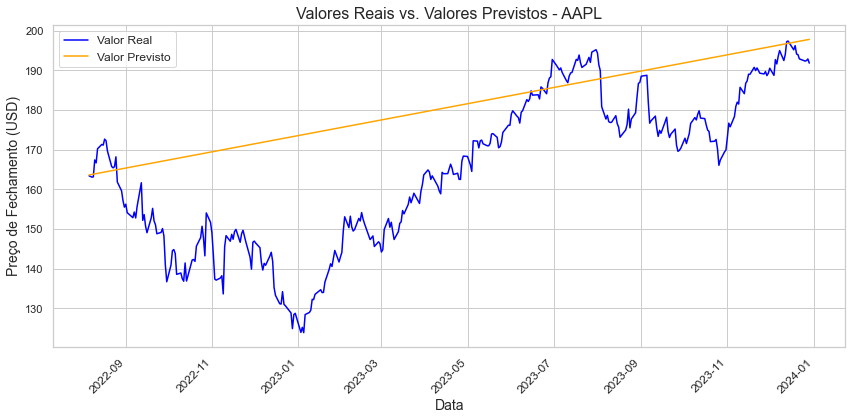

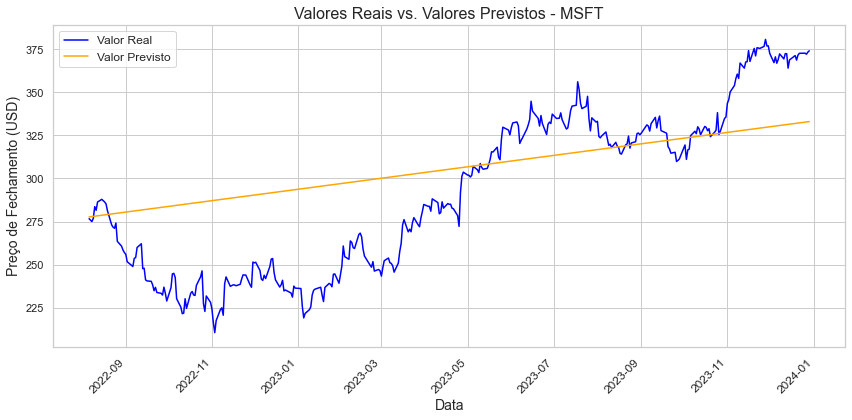

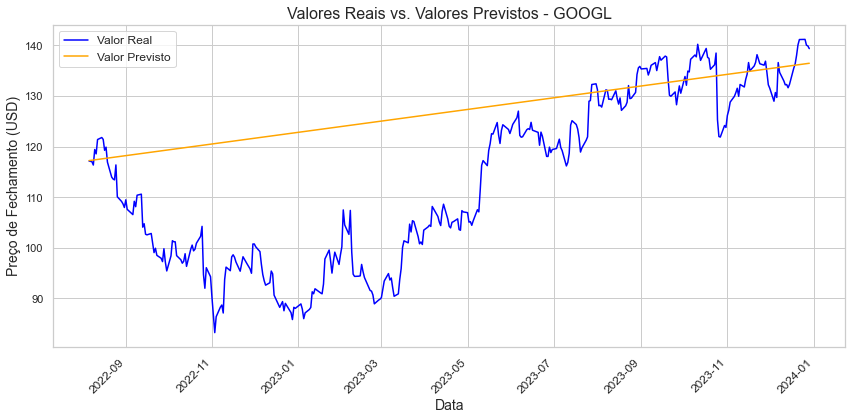

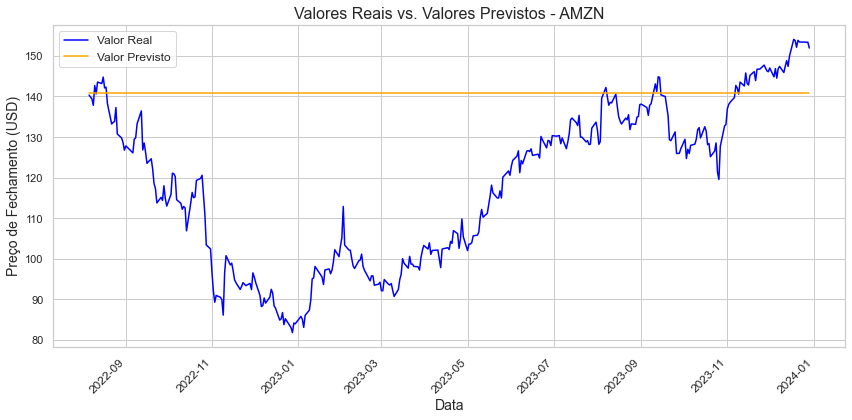

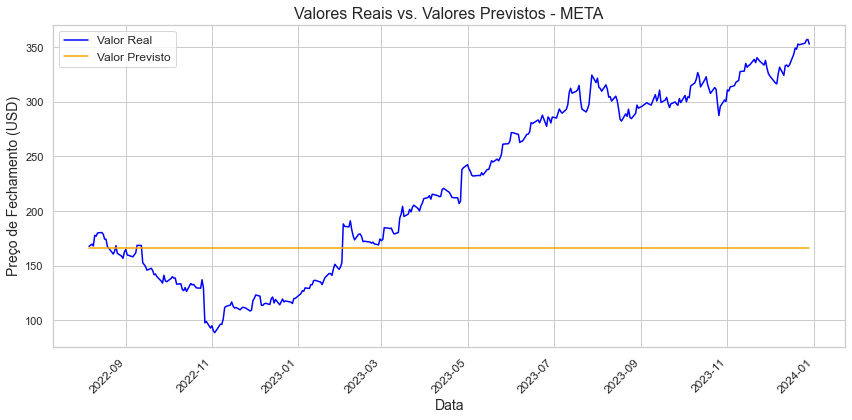

In [8]:
sns.set(style="whitegrid")

for ticker in tickers:
    plt.figure(figsize=(12, 6))
    
    # Filtrar os dados do ticker atual
    merged_ticker_data = merged_data[merged_data['Ticker'] == ticker].dropna()
    
    # Verificar se há dados suficientes para plotar
    if not merged_ticker_data.empty:
        # Gráfico de linha para valores reais e previstos
        sns.lineplot(x='Date', y='Real', data=merged_ticker_data, label='Valor Real', color='blue')
        sns.lineplot(x='Date', y='Predicted', data=merged_ticker_data, label='Valor Previsto', color='orange')

        # Configurar gráfico
        plt.title(f'Valores Reais vs. Valores Previstos - {ticker}', fontsize=16)
        plt.xlabel('Data', fontsize=14)
        plt.ylabel('Preço de Fechamento (USD)', fontsize=14)
        plt.legend(fontsize=12)
        
        # Melhorar a formatação do eixo x
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        
        # Exibir o gráfico
        plt.show()
    else:
        print(f"Nenhum dado disponível para o ticker {ticker}.")